In [12]:
import polars as pl

train_data = pl.read_csv("../../train.csv", has_header=True).drop(["FarmID", "State", "geometry"])
test_data = pl.read_csv("../../test.csv", has_header=True).drop(["FarmID", "State", "geometry"])
train_data

category,Crop,District,Sub-District,SDate,HDate,CropCoveredArea,CHeight,CNext,CLast,CTransp,IrriType,IrriSource,IrriCount,WaterCov,ExpYield,Season,tif_path
str,str,str,str,str,str,i64,i64,str,str,str,str,str,i64,i64,i64,str,str
"""Healthy""","""Paddy""","""Medak""","""Kulcharam""","""2023-11-25 0:00:00""","""2024-04-14 0:00:00""",97,54,"""Pea""","""Lentil""","""Transplanting""","""Flood""","""Groundwater""",4,87,17,"""Rabi""","""downloads/20240412T050649_2024…"
"""Healthy""","""Paddy""","""Medak""","""Kulcharam""","""2023-11-13 0:00:00""","""2024-04-26 0:00:00""",82,58,"""Pea""","""Lentil""","""Transplanting""","""Flood""","""Canal""",5,94,15,"""Rabi""","""downloads/20240425T051649_2024…"
"""Healthy""","""Paddy""","""Medak""","""Kulcharam""","""2023-12-19 0:00:00""","""2024-04-28 0:00:00""",92,91,"""Pea""","""Lentil""","""Transplanting""","""Flood""","""Canal""",3,99,20,"""Rabi""","""downloads/20240427T050651_2024…"
"""Diseased""","""Paddy""","""Medak""","""Kulcharam""","""2023-02-11 0:00:00""","""2024-11-04 0:00:00""",91,52,"""Pea""","""Lentil""","""Transplanting""","""Flood""","""Canal""",5,92,16,"""Rabi""","""downloads/20241103T050951_2024…"
"""Diseased""","""Paddy""","""Medak""","""Kulcharam""","""2023-12-12 0:00:00""","""2024-05-19 0:00:00""",94,55,"""Pea""","""Lentil""","""Transplanting""","""Flood""","""Canal""",5,97,20,"""Rabi""","""downloads/20240517T050651_2024…"
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Healthy""","""Cotton""","""Adilabad""","""Bela""","""2023-01-05 0:00:00""","""2023-09-30 0:00:00""",78,81,"""Sorghum""","""Maize""","""Broadcasting""","""Drip""","""Tubewell""",2,60,18,"""Kharif""","""downloads/20230925T050659_2023…"
"""Healthy""","""Cotton""","""Adilabad""","""Bela""","""2023-05-24 0:00:00""","""2023-09-11 0:00:00""",81,110,"""Maize""","""Maize""","""Seed Drilling""","""Drip""","""Rainfed""",3,45,11,"""Kharif""","""downloads/20230910T050701_2023…"
"""Healthy""","""Cotton""","""Adilabad""","""Bela""","""2023-06-06 0:00:00""","""2023-12-30 0:00:00""",68,66,"""Sorghum""","""Sorghum""","""Broadcasting""","""Sprinkler""","""Canal""",3,58,14,"""Kharif""","""downloads/20231229T051221_2023…"


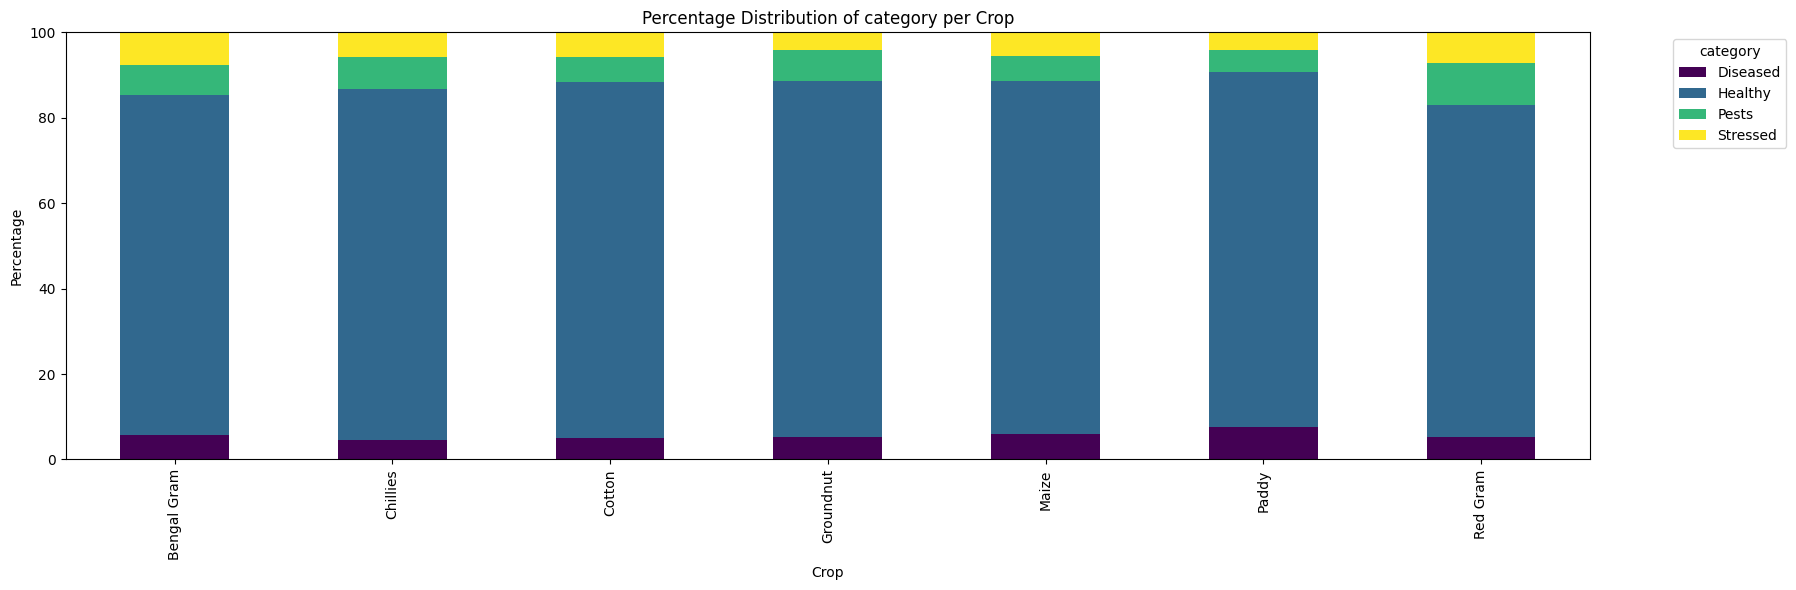

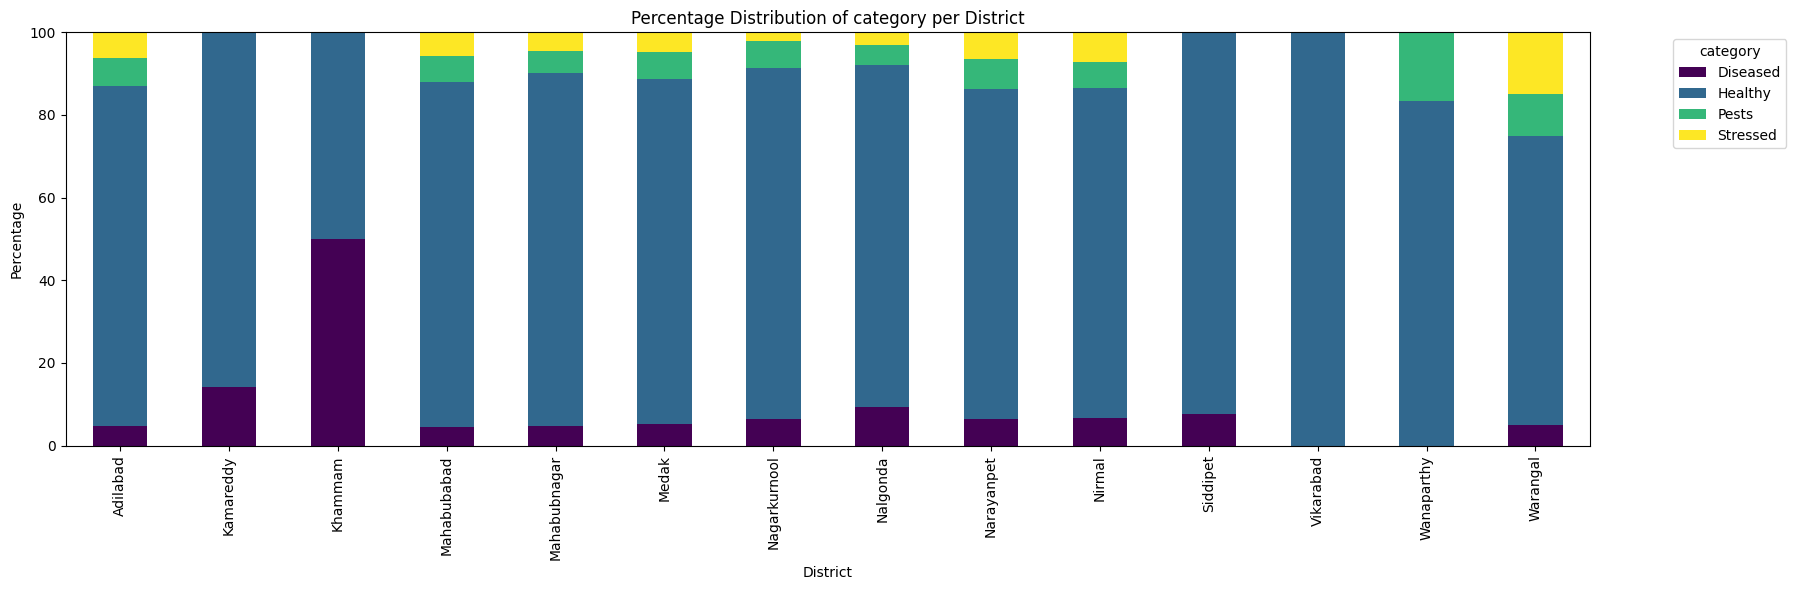

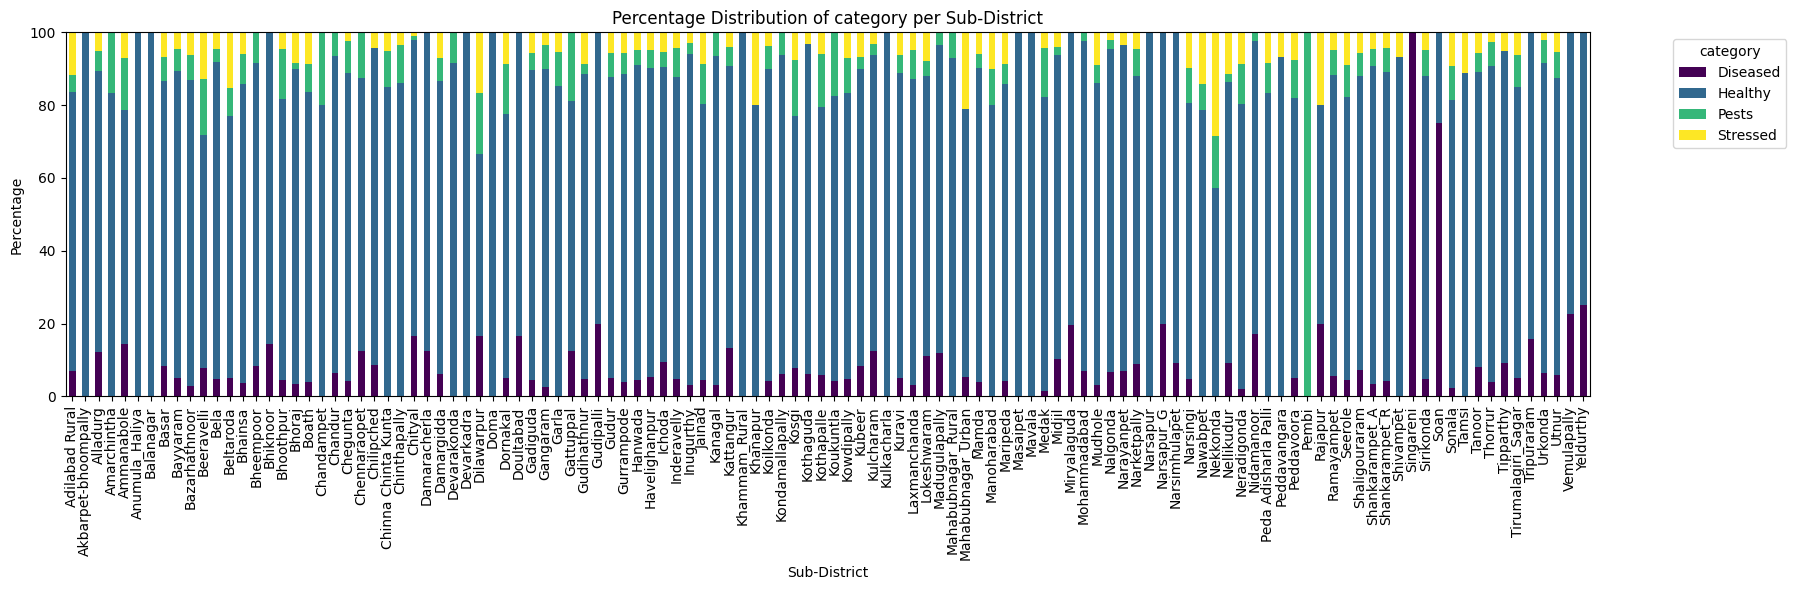

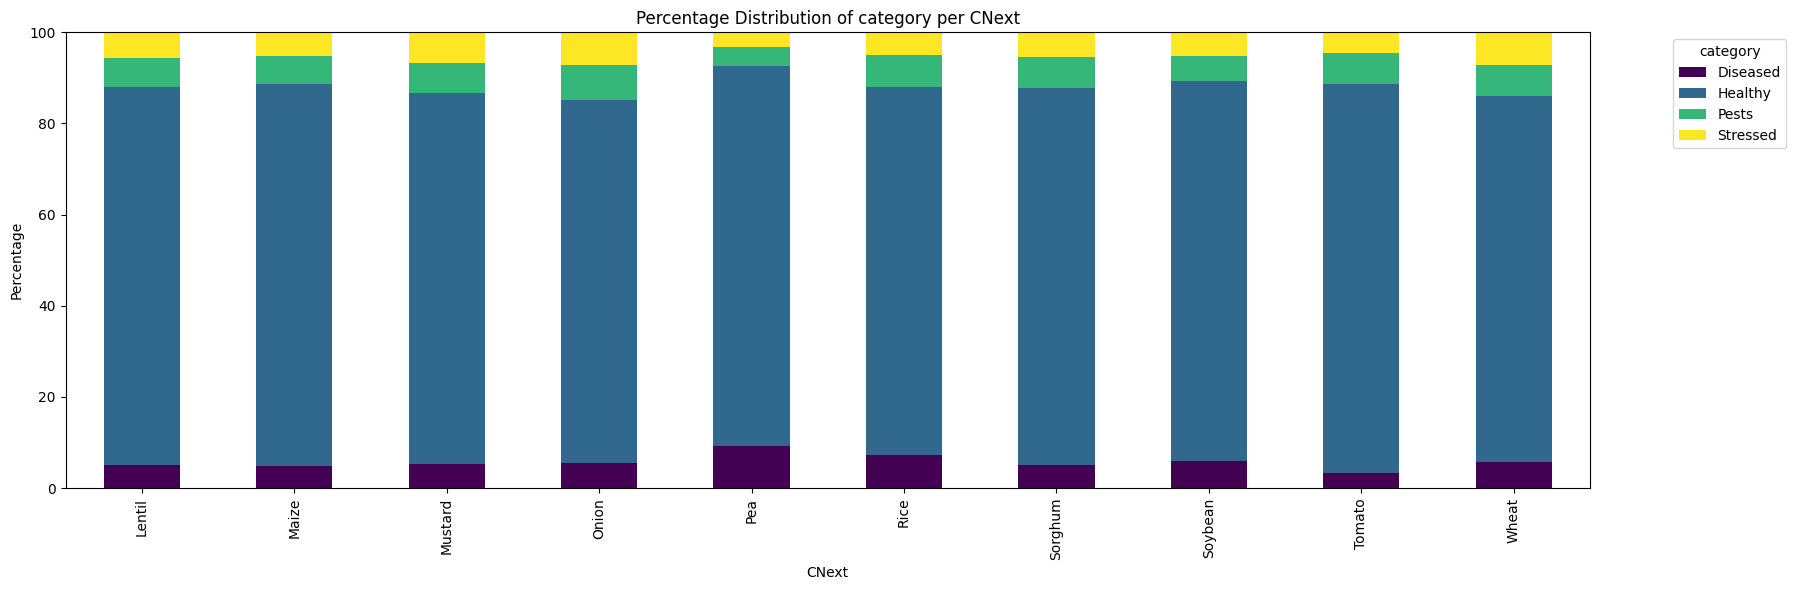

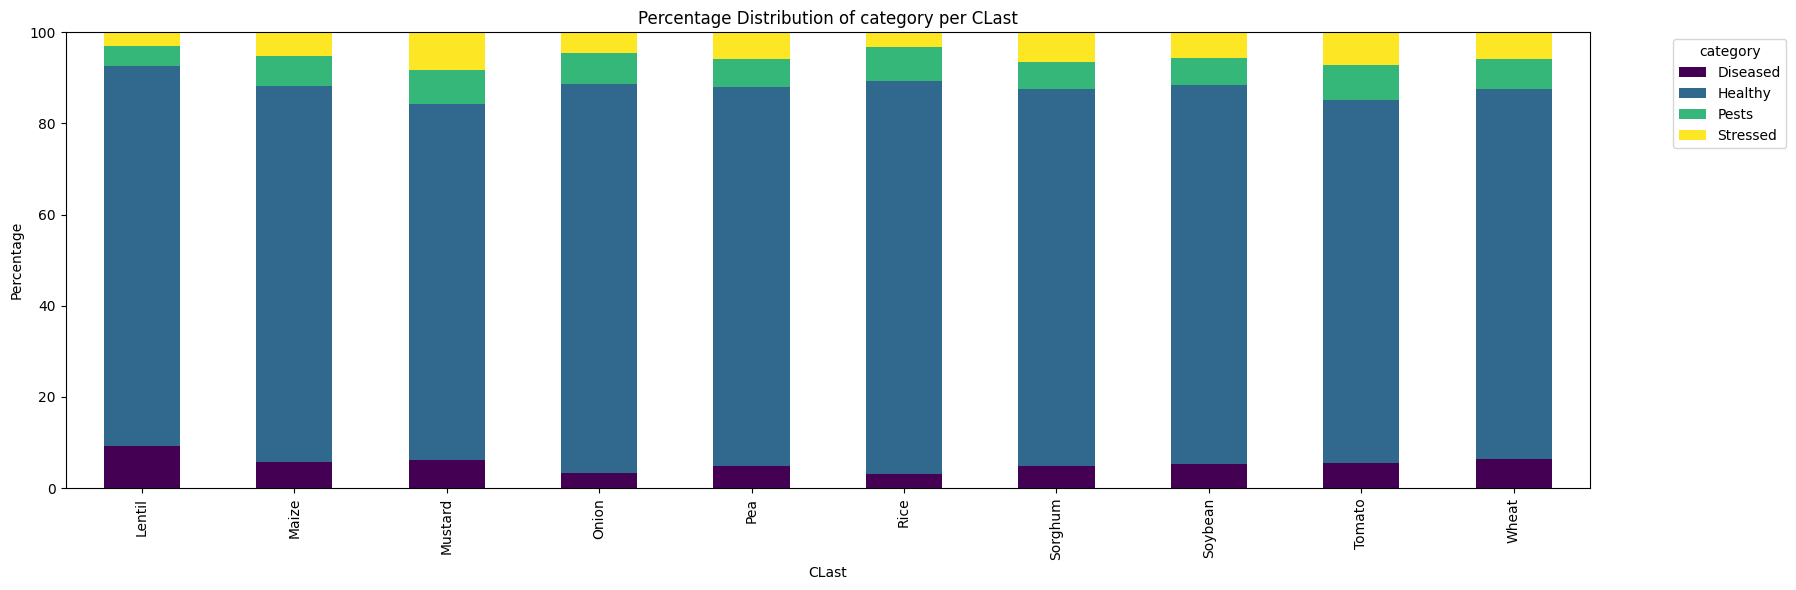

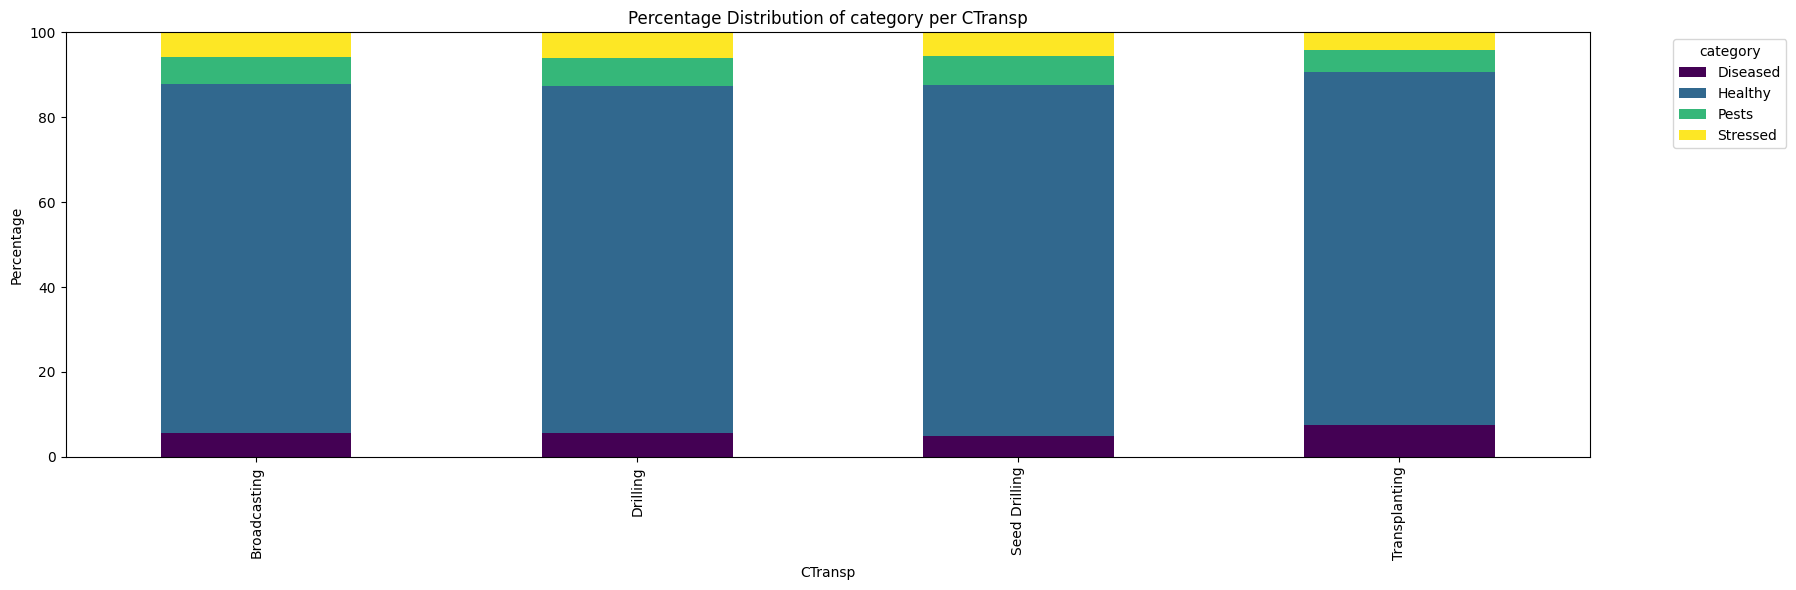

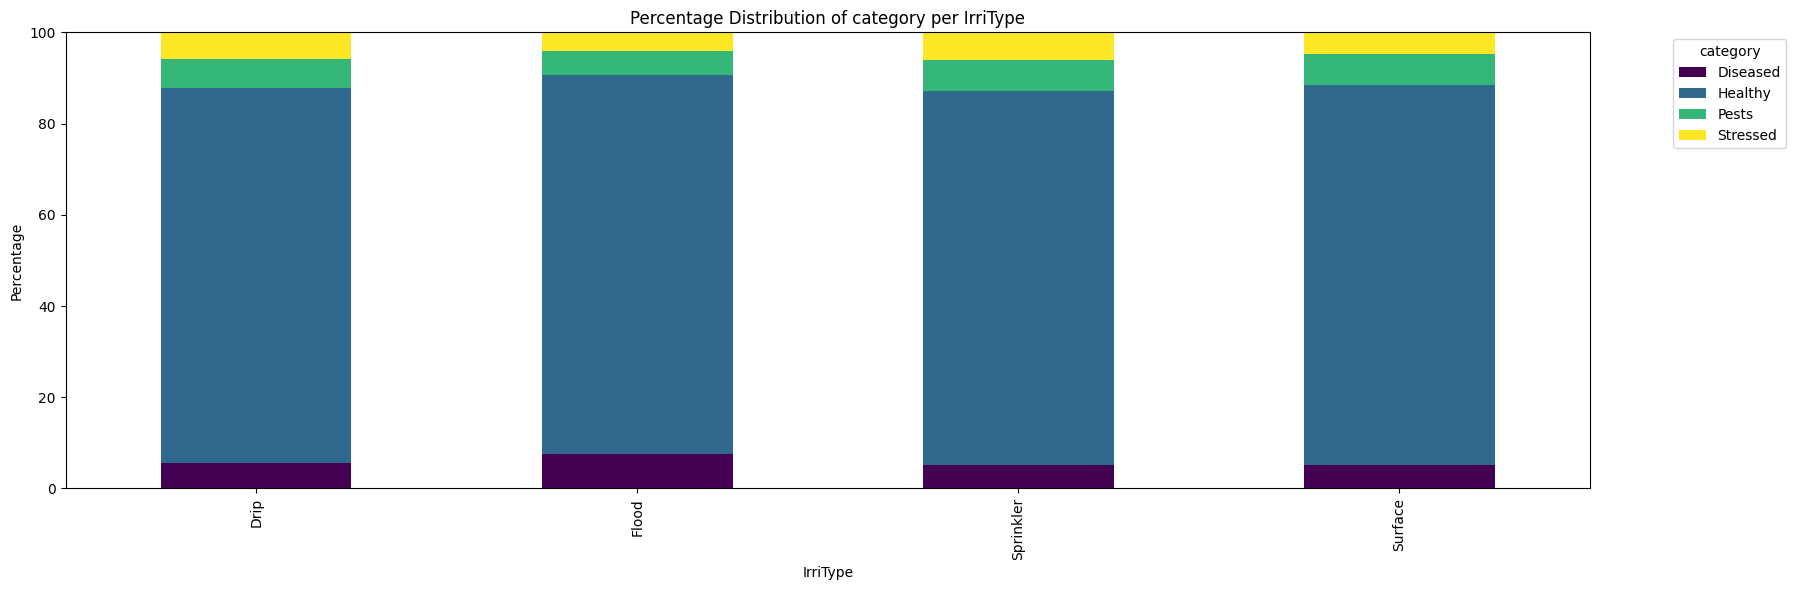

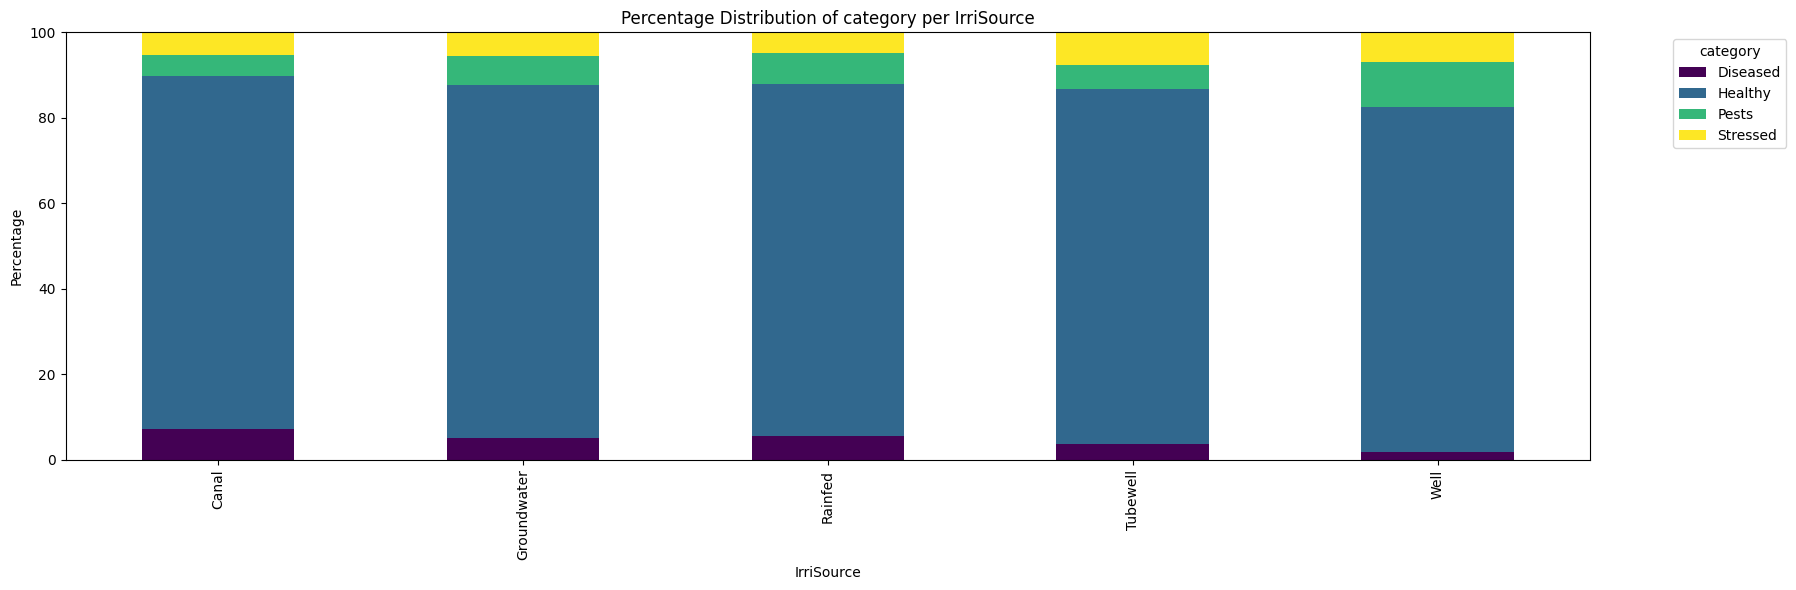

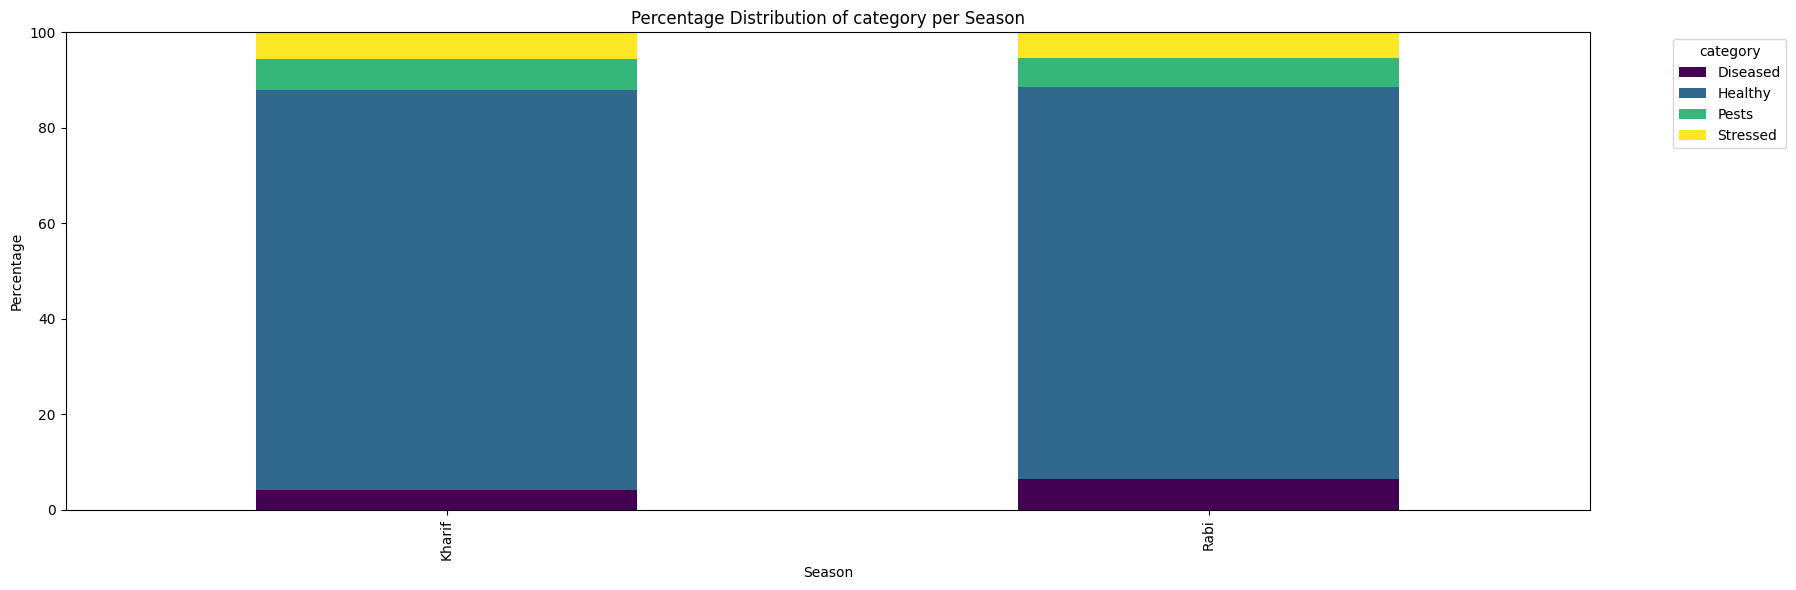

In [13]:
import matplotlib.pyplot as plt
df = train_data.to_pandas()
def plot_percentage_stacked_bar(df, crop_col, category_col):
    """
    Plots a 100% stacked bar plot for each crop, with category distributions as the stacked segments.

    Args:
    - df (pd.DataFrame): The input DataFrame.
    - crop_col (str): The column name for the crop category.
    - category_col (str): The column name for the subcategory (category) to be plotted.
    """
    # Calculate the percentage of each category per crop
    crop_category_counts = df.groupby([crop_col, category_col]).size().unstack(fill_value=0)
    crop_category_percentage = crop_category_counts.div(crop_category_counts.sum(axis=1), axis=0) * 100

    # Plot the stacked bar chart
    ax = crop_category_percentage.plot(
        kind='bar',
        stacked=True,
        colormap='viridis',
        figsize=(18, 6)
    )

    # Customize plot appearance
    plt.title(f'Percentage Distribution of {category_col} per {crop_col}')
    plt.ylabel('Percentage')
    plt.xlabel(crop_col)
    plt.legend(title=category_col, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.ylim(0, 100)
    plt.tight_layout()

    # Show the plot
    plt.show()

cat_cols = ["Crop", "District", "Sub-District", "CNext", "CLast", "CTransp", "IrriType", "IrriSource", "Season"]
for col in cat_cols:
    plot_percentage_stacked_bar(df, col, 'category')